In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [167]:
df = pd.read_csv("clean_data.csv")
df.head()

,Unnamed: 0,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,...,Released,Runtime,Title,Website,Writer,Year,imdbID,imdbRating,imdbVotes,rating
0,0,"Charlize Theron, Christina Ricci, Bruce Dern, ...",Won 1 Oscar. Another 29 wins & 25 nominations.,"$34,187,787","Germany, USA",01 Jun 2004,Patty Jenkins,"Biography, Crime, Drama, Thriller",English,74.0,...,30 Jan 2004,109 min,Monster,http://www.monsterfilm.com/,Patty Jenkins,2003,tt0340855,7.3,"123,001",3
1,1,"Devon Alan, Laura Harris, Zooey Deschanel, Mar...",1 nomination.,NaN,"Canada, USA",NaN,Marcel Sarmiento,NaN,English,NaN,...,01 Apr 2003,127 min,It's Better to Be Wanted for Murder Than Not t...,NaN,Marcel Sarmiento,2003,tt0339882,6.6,31,1
2,2,"Halle Berry, Robert Downey Jr., Charles S. Dut...",3 wins & 7 nominations.,"$59,537,388","USA, France, Canada, Spain",23 Mar 2004,Mathieu Kassovitz,"Horror, Mystery, Thriller",English,38.0,...,21 Nov 2003,98 min,Gothika,http://gothikamovie.warnerbros.com/,Sebastian Gutierrez,2003,tt0348836,5.8,"99,552",3
3,3,"Sean Connery, Naseeruddin Shah, Peta Wilson, T...",12 nominations.,"$66,327,144","USA, Germany, Czech Republic, UK",16 Dec 2003,Stephen Norrington,"Action, Adventure, Fantasy, Sci-Fi","English, German, Italian",30.0,...,11 Jul 2003,110 min,The League of Extraordinary Gentlemen,http://www.lxgmovie.com,"Alan Moore (comic books), Kevin O'Neill (comic...",2003,tt0311429,5.8,"156,033",0
4,4,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...",2 wins & 4 nominations.,NaN,"USA, Canada",11 May 2004,David Zucker,Comedy,English,49.0,...,24 Oct 2003,84 min,Scary Movie 3,http://www.scarymovie.com/sm3_home.html,"Craig Mazin, Pat Proft, Shawn Wayans (characte...",2003,tt0306047,5.5,"126,494",3


In [168]:
del df['Unnamed: 0']
del df['DVD']
del df['Poster']
del df['Website']
del df['Actors']
del df['Awards']
del df['BoxOffice']
del df['Country']
del df['Director']
del df['Production']
del df['Runtime']
del df['Plot']

df.columns

Index(['Genre', 'Language', 'Metascore', 'Rated', 'Ratings', 'Released',
       'Title', 'Writer', 'Year', 'imdbID', 'imdbRating', 'imdbVotes',
       'rating'],
      dtype='object')

In [169]:
genre = df['Genre']
genre

0                 Biography, Crime, Drama, Thriller
1                                               NaN
2                         Horror, Mystery, Thriller
3                Action, Adventure, Fantasy, Sci-Fi
4                                            Comedy
5                                     Comedy, Drama
6                                    Action, Sci-Fi
7                                     Comedy, Short
8                            Comedy, Drama, Romance
9                                    Drama, History
10                       Action, Adventure, Fantasy
11                         Horror, Sci-Fi, Thriller
12                            Comedy, Drama, Family
13                                           Horror
14                           Crime, Drama, Thriller
15                          Action, Crime, Thriller
16                                           Comedy
17                                  Comedy, Romance
18                                   Comedy, Family
19          

In [170]:

df['Genre'] = df["Genre"].str.split(",", n = -1, expand = False) 

df.head()

,Genre,Language,Metascore,Rated,Ratings,Released,Title,Writer,Year,imdbID,imdbRating,imdbVotes,rating
0,"[Biography, Crime, Drama, Thriller]",English,74.0,R,"[{'Source': 'Internet Movie Database', 'Value'...",30 Jan 2004,Monster,Patty Jenkins,2003,tt0340855,7.3,"123,001",3
1,NaN,English,NaN,NaN,"[{'Source': 'Internet Movie Database', 'Value'...",01 Apr 2003,It's Better to Be Wanted for Murder Than Not t...,Marcel Sarmiento,2003,tt0339882,6.6,31,1
2,"[Horror, Mystery, Thriller]",English,38.0,R,"[{'Source': 'Internet Movie Database', 'Value'...",21 Nov 2003,Gothika,Sebastian Gutierrez,2003,tt0348836,5.8,"99,552",3
3,"[Action, Adventure, Fantasy, Sci-Fi]","English, German, Italian",30.0,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",11 Jul 2003,The League of Extraordinary Gentlemen,"Alan Moore (comic books), Kevin O'Neill (comic...",2003,tt0311429,5.8,"156,033",0
4,[Comedy],English,49.0,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",24 Oct 2003,Scary Movie 3,"Craig Mazin, Pat Proft, Shawn Wayans (characte...",2003,tt0306047,5.5,"126,494",3


In [171]:
#seperated dataframe by B rating
df_b3 = df.loc[df['rating'] == 3, :]
df_b2 = df.loc[df['rating'] == 2, :]
df_b1 = df.loc[df['rating'] == 1, :]
df_b0 = df.loc[df['rating'] == 0, :]
df_b3

,Genre,Language,Metascore,Rated,Ratings,Released,Title,Writer,Year,imdbID,imdbRating,imdbVotes,rating
0,"[Biography, Crime, Drama, Thriller]",English,74.0,R,"[{'Source': 'Internet Movie Database', 'Value'...",30 Jan 2004,Monster,Patty Jenkins,2003,tt0340855,7.3,"123,001",3
2,"[Horror, Mystery, Thriller]",English,38.0,R,"[{'Source': 'Internet Movie Database', 'Value'...",21 Nov 2003,Gothika,Sebastian Gutierrez,2003,tt0348836,5.8,"99,552",3
4,[Comedy],English,49.0,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",24 Oct 2003,Scary Movie 3,"Craig Mazin, Pat Proft, Shawn Wayans (characte...",2003,tt0306047,5.5,"126,494",3
5,"[Comedy, Drama]","French, Japanese",75.0,Unrated,"[{'Source': 'Internet Movie Database', 'Value'...",12 Mar 2003,Fear and Trembling,"Amélie Nothomb (novel), Alain Corneau (scenario)",2003,tt0318725,7.1,"3,964",3
8,"[Comedy, Drama, Romance]","English, French",66.0,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",12 Dec 2003,Something's Gotta Give,Nancy Meyers,2003,tt0337741,6.7,"102,183",3
10,"[Action, Adventure, Fantasy]","English, Mandarin",43.0,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",25 Jul 2003,Lara Croft Tomb Raider: The Cradle of Life,"Dean Georgaris (screenplay), Steven E. de Souz...",2003,tt0325703,5.5,"120,580",3
11,"[Horror, Sci-Fi, Thriller]",English,NaN,R,"[{'Source': 'Internet Movie Database', 'Value'...",15 Jan 2003,Rats,"Jace Anderson (screenplay), Boaz Davidson (sto...",2003,tt0277986,3.5,938,3
13,[Horror],English,32.0,R,"[{'Source': 'Internet Movie Database', 'Value'...",30 May 2003,Wrong Turn,Alan B. McElroy,2003,tt0295700,6.1,"100,007",3
16,[Comedy],English,47.0,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",02 Jul 2003,"Legally Blonde 2: Red, White & Blonde","Amanda Brown (characters), Eve Ahlert (story),...",2003,tt0333780,4.7,"55,630",3
17,"[Comedy, Romance]",English,NaN,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",22 Aug 2003,My Boss's Daughter,David Dorfman,2003,tt0270980,4.7,"26,654",3


In [172]:
def flatten(l):
    flat_list = []
    for item in l:
        if isinstance(item, (list, tuple)):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

mabel = df_b0["Genre"]
fred = flatten(mabel)
ricky = []

for item in fred:
    x = str(item).strip()
    ricky.append(x)
data0 = pd.Series(ricky)
data0.unique()
data_0 = data0.value_counts()
data_b0 = pd.DataFrame(data_0)

In [173]:
def flatten(l):
    flat_list = []
    for item in l:
        if isinstance(item, (list, tuple)):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

mabel = df_b1["Genre"]
fred = flatten(mabel)
ricky = []

for item in fred:
    x = str(item).strip()
    ricky.append(x)
data1 = pd.Series(ricky)
data1.unique()
data_1 = data1.value_counts()
data_b1 = pd.DataFrame(data_1)


In [174]:
def flatten(l):
    flat_list = []
    for item in l:
        if isinstance(item, (list, tuple)):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

mabel = df_b2["Genre"]
fred = flatten(mabel)
ricky = []

for item in fred:
    x = str(item).strip()
    ricky.append(x)
data2 = pd.Series(ricky)
data2.unique()
data_2 = data2.value_counts()
data_b2 = pd.DataFrame(data_2)


In [175]:
def flatten(l):
    flat_list = []
    for item in l:
        if isinstance(item, (list, tuple)):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

mabel = df_b3["Genre"]
fred = flatten(mabel)
ricky = []

for item in fred:
    x = str(item).strip()
    ricky.append(x)
data3 = pd.Series(ricky)
data3.unique()
data_3 = data3.value_counts()
data_b3 = pd.DataFrame(data_3)


In [176]:
summary_df = pd.DataFrame({0: data_b0[0], 1:data_b1[0], 2:data_b2[0], 3:data_b3[0]})

In [177]:
summary_df["Totals"] = summary_df[0] + summary_df[1] + summary_df[2] + summary_df[3]

Text(0, 0.5, 'Number of Movies')

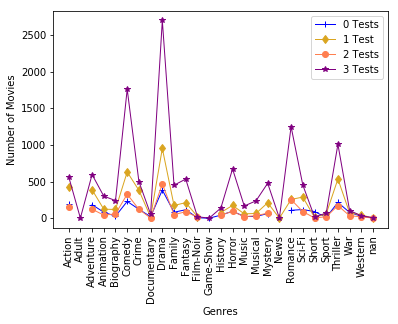

In [190]:
Tests0 = plt.plot(summary_df.index, summary_df[0], marker="+",color="blue", linewidth=1, label="0 Tests")
Tests1 = plt.plot(summary_df.index, summary_df[1], marker="d",color="goldenrod", linewidth=1, label="1 Test")
Tests2 = plt.plot(summary_df.index, summary_df[2], marker="o",color="coral", linewidth=1, label="2 Tests")
Tests3 = plt.plot(summary_df.index, summary_df[3], marker="*",color="purple", linewidth=1, label="3 Tests")
plt.xticks(rotation = 90)
plt.legend(loc="best")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")